In [1]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.
C:\Users\HP RYZEN 3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP RYZEN 3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP RYZEN 3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP

In [2]:
print(x_train.shape)

(404, 13)


In [3]:
print(y_train.shape)

(404,)


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Regression Model

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression(normalize=True)

In [7]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [8]:
print(lr.coef_)

[-1.19997513e-01  5.70003304e-02  3.98379660e-03  4.12698187e+00
 -2.05002963e+01  3.38024903e+00  7.56807584e-03 -1.71189793e+00
  3.34747537e-01 -1.17797225e-02 -9.02318039e-01  8.71912756e-03
 -5.55842510e-01]


In [9]:
print(lr.intercept_)

40.29367058057682


In [10]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.7399643695249463
0.7213535934621554


In [11]:
ypred = lr.predict(x_test)

In [12]:
diff = abs(ypred[0:-1] - y_test[0:-1])
mae = diff.mean()
print(mae)

3.4951232071330383


In [13]:
int(max(ypred))

41

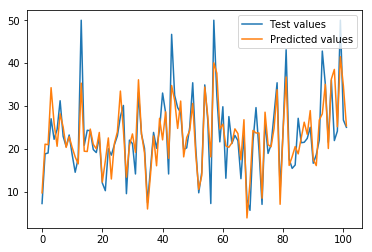

In [14]:
plt.plot(range(102), y_test, label = 'Test values')
plt.plot(range(102), ypred, label = 'Predicted values')
plt.legend()

## using neural networks

In [36]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [37]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [119]:
model = Sequential()

In [120]:
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

In [121]:
model.compile(optimizer= 'adam', loss = 'huber_loss', metrics = ['mae'])

In [122]:
history = model.fit(x_train, y_train, epochs = 500)

Epoch 1/500
404/404 [==============================] - 0s 867us/sample - loss: 21.8013 - mean_absolute_error: 22.3013
Epoch 2/500
404/404 [==============================] - 0s 89us/sample - loss: 21.7183 - mean_absolute_error: 22.2183
Epoch 3/500
404/404 [==============================] - 0s 89us/sample - loss: 21.6309 - mean_absolute_error: 22.1309
Epoch 4/500
404/404 [==============================] - 0s 99us/sample - loss: 21.5354 - mean_absolute_error: 22.0354
Epoch 5/500
404/404 [==============================] - 0s 99us/sample - loss: 21.4302 - mean_absolute_error: 21.9302
Epoch 6/500
404/404 [==============================] - 0s 99us/sample - loss: 21.3145 - mean_absolute_error: 21.8145
Epoch 7/500
404/404 [==============================] - 0s 89us/sample - loss: 21.1875 - mean_absolute_error: 21.6875
Epoch 8/500
404/404 [==============================] - 0s 109us/sample - loss: 21.0490 - mean_absolute_error: 21.5490
Epoch 9/500
404/404 [==============================] - 0s 99us

404/404 [==============================] - 0s 87us/sample - loss: 5.1889 - mean_absolute_error: 5.6638
Epoch 141/500
404/404 [==============================] - 0s 129us/sample - loss: 5.1810 - mean_absolute_error: 5.6563
Epoch 142/500
404/404 [==============================] - 0s 109us/sample - loss: 5.1724 - mean_absolute_error: 5.6480
Epoch 143/500
404/404 [==============================] - 0s 99us/sample - loss: 5.1635 - mean_absolute_error: 5.6395
Epoch 144/500
404/404 [==============================] - 0s 89us/sample - loss: 5.1569 - mean_absolute_error: 5.6323
Epoch 145/500
404/404 [==============================] - 0s 89us/sample - loss: 5.1481 - mean_absolute_error: 5.6238
Epoch 146/500
404/404 [==============================] - 0s 79us/sample - loss: 5.1394 - mean_absolute_error: 5.6159
Epoch 147/500
404/404 [==============================] - 0s 89us/sample - loss: 5.1316 - mean_absolute_error: 5.6086
Epoch 148/500
404/404 [==============================] - 0s 89us/sample - lo

404/404 [==============================] - 0s 99us/sample - loss: 4.7514 - mean_absolute_error: 5.2225
Epoch 211/500
404/404 [==============================] - 0s 93us/sample - loss: 4.7480 - mean_absolute_error: 5.2184
Epoch 212/500
404/404 [==============================] - 0s 89us/sample - loss: 4.7434 - mean_absolute_error: 5.2137
Epoch 213/500
404/404 [==============================] - 0s 89us/sample - loss: 4.7393 - mean_absolute_error: 5.2091
Epoch 214/500
404/404 [==============================] - 0s 119us/sample - loss: 4.7354 - mean_absolute_error: 5.2051
Epoch 215/500
404/404 [==============================] - 0s 103us/sample - loss: 4.7339 - mean_absolute_error: 5.2038
Epoch 216/500
404/404 [==============================] - 0s 89us/sample - loss: 4.7284 - mean_absolute_error: 5.1980
Epoch 217/500
404/404 [==============================] - 0s 89us/sample - loss: 4.7248 - mean_absolute_error: 5.1940
Epoch 218/500
404/404 [==============================] - 0s 99us/sample - lo

404/404 [==============================] - 0s 116us/sample - loss: 4.4688 - mean_absolute_error: 4.9332
Epoch 350/500
404/404 [==============================] - 0s 89us/sample - loss: 4.4683 - mean_absolute_error: 4.9330
Epoch 351/500
404/404 [==============================] - 0s 99us/sample - loss: 4.4671 - mean_absolute_error: 4.9324
Epoch 352/500
404/404 [==============================] - 0s 99us/sample - loss: 4.4661 - mean_absolute_error: 4.9316
Epoch 353/500
404/404 [==============================] - 0s 94us/sample - loss: 4.4680 - mean_absolute_error: 4.9325
Epoch 354/500
404/404 [==============================] - 0s 89us/sample - loss: 4.4639 - mean_absolute_error: 4.9283
Epoch 355/500
404/404 [==============================] - 0s 99us/sample - loss: 4.4625 - mean_absolute_error: 4.9269
Epoch 356/500
404/404 [==============================] - 0s 84us/sample - loss: 4.4613 - mean_absolute_error: 4.9258
Epoch 357/500
404/404 [==============================] - 0s 84us/sample - los

404/404 [==============================] - 0s 129us/sample - loss: 4.4026 - mean_absolute_error: 4.8646
Epoch 420/500
404/404 [==============================] - 0s 108us/sample - loss: 4.4005 - mean_absolute_error: 4.8631
Epoch 421/500
404/404 [==============================] - 0s 119us/sample - loss: 4.3985 - mean_absolute_error: 4.8611
Epoch 422/500
404/404 [==============================] - 0s 109us/sample - loss: 4.3993 - mean_absolute_error: 4.8610
Epoch 423/500
404/404 [==============================] - 0s 109us/sample - loss: 4.3983 - mean_absolute_error: 4.8614
Epoch 424/500
404/404 [==============================] - 0s 109us/sample - loss: 4.3956 - mean_absolute_error: 4.8587
Epoch 425/500
404/404 [==============================] - 0s 89us/sample - loss: 4.3953 - mean_absolute_error: 4.8580
Epoch 426/500
404/404 [==============================] - ETA: 0s - loss: 5.3566 - mean_absolute_error: 5.836 - 0s 78us/sample - loss: 4.3942 - mean_absolute_error: 4.8568
Epoch 427/500
404/

In [123]:
vloss, vacc = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 2ms/sample - loss: 5.0533 - mean_absolute_error: 5.5396


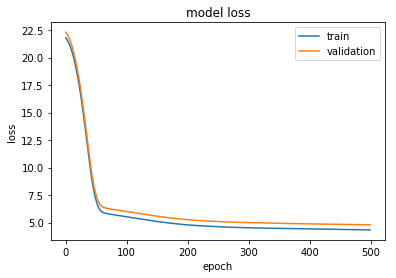

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()